In [116]:
data = {"1.html": {"2.html", "3.html"}, "2.html": {"3.html"}, "3.html": {"2.html"}, "4.html": {"2.html"}}
data1 = {"1.html": {"3.html"}, "2.html": {"3.html"}, "3.html": {"2.html"}, "4.html": {"2.html"}}

In [122]:
damping_factor = 0.85
n = 10

def transition_model(corpus, page, damping_factor):
    """
    Return a probability distribution over which page to visit next,
    given a current page.
    With probability `damping_factor`, choose a link at random
    linked to by `page`. With probability `1 - damping_factor`, choose
    a link at random chosen from all pages in the corpus.
    """
    # check if page is None
    if corpus[page] == None:
        # add empty dict
        num = {i:0 for i in corpus.keys()}
        # iterate over 
        for key in corpus.keys():
            num[key] += damping_factor / (len(corpus.keys()))
            
    # if corpus is Not None
    if corpus[page] != None:
        # create dict with initial values 
        num = {i:0 + round((1-damping_factor) / len(corpus.keys()), 3) for i in corpus.keys()}
        # iterate over keys, check if page and add distribution 
        for key, value in num.items():
            if key != page:
                num[key] += damping_factor / (len(corpus.keys()) - 1)
    return num
    
transition_model(data, "1.html", damping_factor)

{'1.html': 0.038,
 '2.html': 0.3213333333333333,
 '3.html': 0.3213333333333333,
 '4.html': 0.3213333333333333}

In [123]:
import random

def sample_pagerank(corpus, damping_factor, n):
    """
    Return PageRank values for each page by sampling `n` pages
    according to transition model, starting with a page at random.

    Return a dictionary where keys are page names, and values are
    their estimated PageRank value (a value between 0 and 1). All
    PageRank values should sum to 1.
    """
    # create empty dict
    num = {i:0 for i in corpus.keys()}
    # randomly select first page
    page = random.choice(list(corpus.keys()))
    # iterate over n samples
    for i in range(1, n):
        # get the distribution 
        model = transition_model(corpus, page, damping_factor)
        # iterate over empty dict 
        for g in num:
            # add values with prodived formula
            num[g] = ((i-1) * num[g] + model[g]) / i
        # update randomly pages   
        page = random.choices(list(num.keys()), list(num.values()), k=1)[0]

    return num
    
sample_pagerank(data1, damping_factor, n)

{'1.html': 0.22688888888888886,
 '2.html': 0.32133333333333336,
 '3.html': 0.22688888888888886,
 '4.html': 0.22688888888888886}

In [176]:
import math

def iterate_pagerank(corpus, damping_factor):
    """
    Return PageRank values for each page by iteratively updating
    PageRank values until convergence.

    Return a dictionary where keys are page names, and values are
    their estimated PageRank value (a value between 0 and 1). All
    PageRank values should sum to 1.
    """
    
    old = {i:(1 / len(corpus.keys())) for i in corpus.keys()}
    new = {i: math.inf for i in corpus.keys()}
    lenth = len(corpus)
    
    while any(g > 0.001 for g in new.values()):
        
        for page in old.keys():
            proba = 0
            for keys, pages in corpus.items():
                
                if not pages:
                    
                    pages = corpus.keys()
                    
                if page in pages:
                    
                    proba += old[keys] / len(pages)
                    
            new_rank = ((1 - damping_factor) / lenth) + (damping_factor * proba)
            
            new[page] = abs(new_rank - old[page])
            
            old[page] = new_rank
            
    return old

iterate_pagerank(data1, damping_factor)

{'1.html': 0.037500000000000006,
 '2.html': 0.4625,
 '3.html': 0.4625,
 '4.html': 0.037500000000000006}

In [17]:
from mxnet import autograd, np, npx

npx.set_np()

In [107]:
x = np.arange(19)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [108]:
x.attach_grad()

In [109]:
x.grad

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [110]:
import math
with autograd.record():
    y = x ** 2 + 12
y

array([ 12.,  13.,  16.,  21.,  28.,  37.,  48.,  61.,  76.,  93., 112.,
       133., 156., 181., 208., 237., 268., 301., 336.])

In [111]:
y.backward()

In [112]:
x.grad

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36.])

In [113]:
x.grad == x*2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [114]:
import matplotlib.pyplot as plt

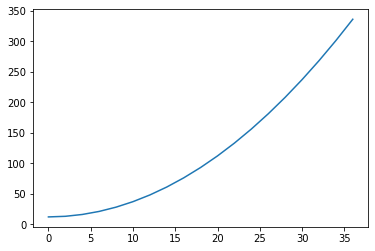

In [115]:
 plt.plot(x.grad, y)